**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

**Our Step-by-Step Approach to check the market clearning conditions**:

1. **Define Parameters and Functions**:
   - We first define the relavent firm and individual behviour functions and parameter values given to us

2. **Prepare the Grid for $p_1$ and $p_2$ Values**:
   - Create arrays of $p_1$ and $p_2$ values using `np.linspace(0.1, 2.0, 10)`.

3. **Initialize Arrays for Storing Results**:
   - `labor_diff`: Stores differences in the labor market clearing condition.
   - `goods1_diff`: Stores differences in the market clearing condition for good 1.
   - `goods2_diff`: Stores differences in the market clearing condition for good 2.
   - Boolean arrays (`labor_clearing`, `goods1_clearing`, `goods2_clearing`) to indicate if market clearing conditions are met within the specified tolerance.

4. **Check Market Clearing Conditions**:
   - Loop through each combination of $p_1$ and $p_2$. 
   - Calculate firm profits and optimal labor supply.
   - Calculate optimal consumption and firm outputs.
   - **Compute differences between supply and demand** for labor and goods.
   - **Market Clearing Definition**: Check if differences are within the specified tolerance and store the results. The market is considered to be clearing if:
     - The difference in the labor market, `labor_diff`, is less than the tolerance.
     - The difference in the market for good 1, `goods1_diff`, is less than the tolerance.
     - The difference in the market for good 2, `goods2_diff`, is less than the tolerance.

5. **Plot the Results**:
   - Create heatmaps to visualize the differences in market clearing conditions.
   - Overlay points where market clearing conditions are met.

### Importance of Grid Resolution and Tolerance

The grid resolution (number of points for $p_1$ and $p_2$ and the tolerance are crucial for accurately identifying market clearing conditions. With only ten points for $p_1$ and $p_2$, the grid is relatively sparse, making it harder to pinpoint exact clearing points. This is why we do not find a market clearing outcome in this implementation.  Increasing the number of grid points or using a more sophisticated search method (e.g. a numerical solver) can help us find the market clearing outcome. We do this in the next question.



In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0
par.w = 1.0

# Question 3
par.kappa = 0.1

No market clearing outcome found within the given tolerance and grid.


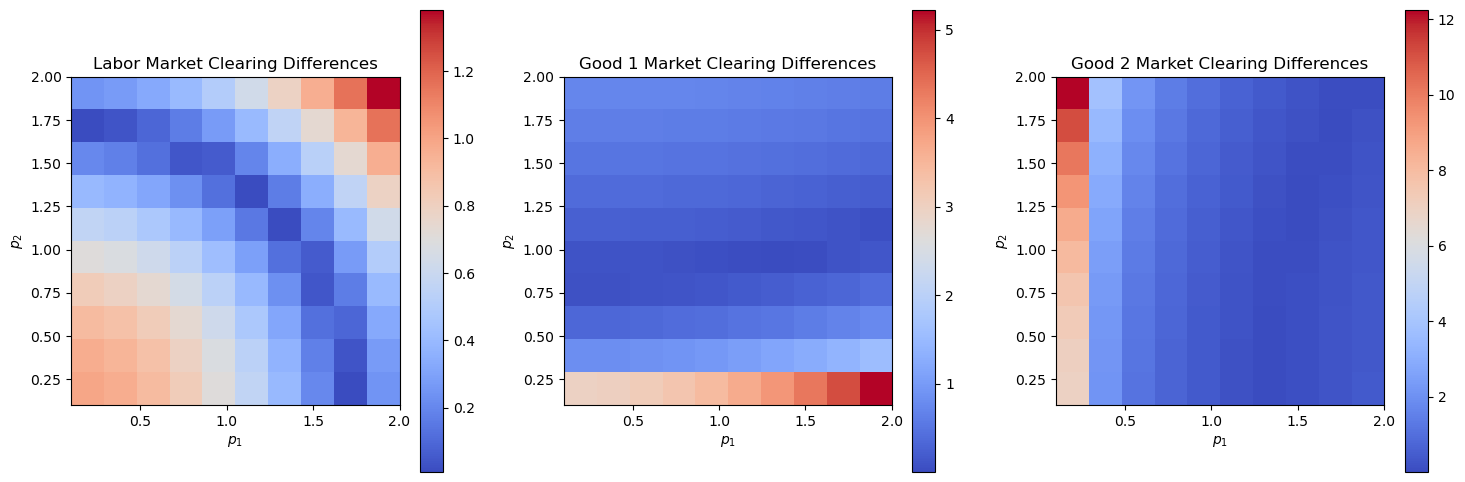

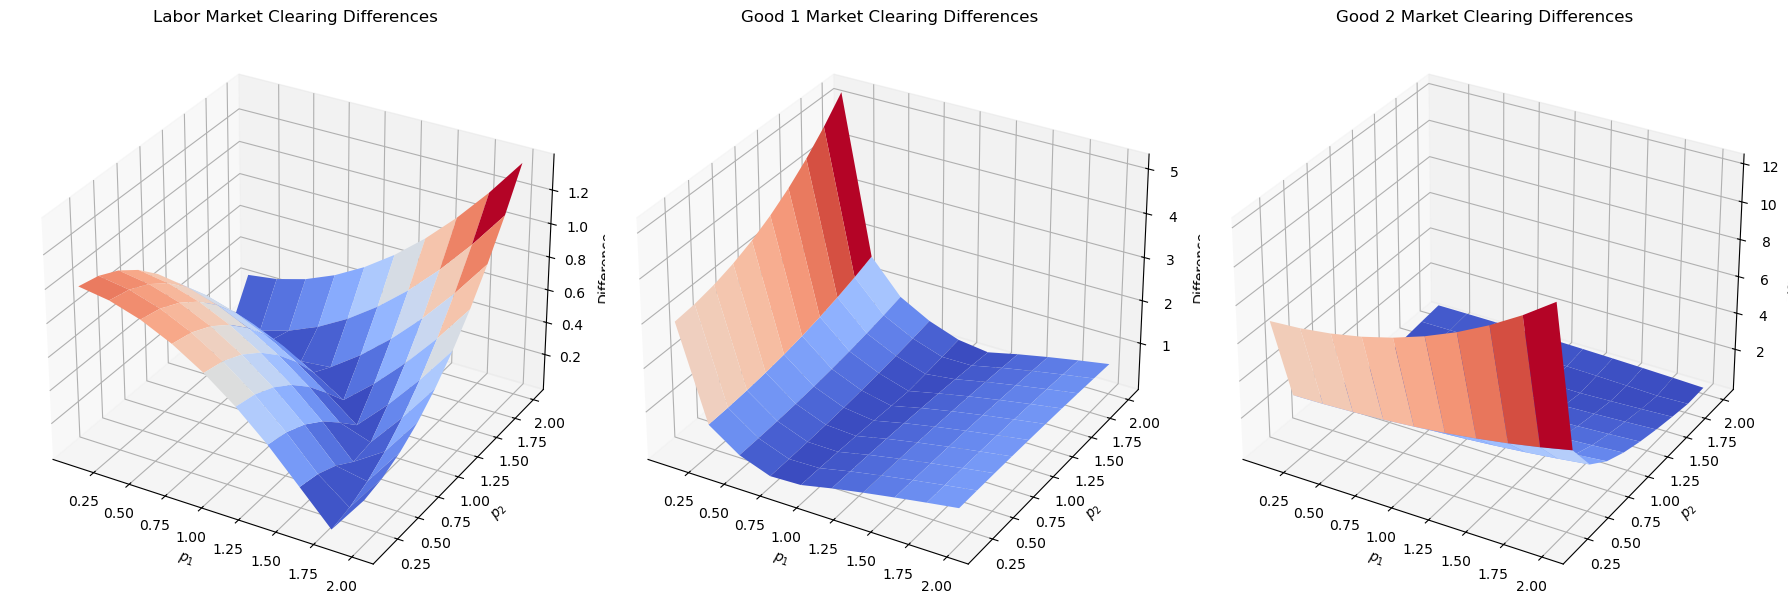

In [3]:
# Tolerance for market clearing
tolerance = 1e-5

# Define firm behavior functions
def labor_demand(p_j, par):
    return (p_j * par.A * par.gamma / 1) ** (1 / (1 - par.gamma))

def output(l_star, par):
    return par.A * (l_star ** par.gamma)

def profit(p_j, par):
    l_star = labor_demand(p_j, par)
    return (1 - par.gamma) / par.gamma * 1 * (p_j * par.A * par.gamma / 1) ** (1 / (1 - par.gamma))

# Define consumer behavior functions
def c1(wl, par, pi1, pi2, p1):
    return par.alpha * (wl + par.T + pi1 + pi2) / p1

def c2(wl, par, pi1, pi2, p2):
    return (1 - par.alpha) * (wl + par.T + pi1 + pi2) / (p2 + par.tau)

def utility(l, par, pi1, pi2, p1, p2):
    wl = 1 * l
    c1_star = c1(wl, par, pi1, pi2, p1)
    c2_star = c2(wl, par, pi1, pi2, p2)
    return np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l**(1 + par.epsilon)) / (1 + par.epsilon)

# Define function to find optimal labor supply
def optimal_labor(par, pi1, pi2, p1, p2):
    result = minimize(lambda l: -utility(l, par, pi1, pi2, p1, p2), x0=1, bounds=[(0, None)])
    return result.x[0]

# Prepare grid for p1 and p2 values
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Initialize arrays to store results
labor_diff = np.zeros((len(p1_values), len(p2_values)))
goods1_diff = np.zeros((len(p1_values), len(p2_values)))
goods2_diff = np.zeros((len(p1_values), len(p2_values)))
labor_clearing = np.zeros((len(p1_values), len(p2_values)), dtype=bool)
goods1_clearing = np.zeros((len(p1_values), len(p2_values)), dtype=bool)
goods2_clearing = np.zeros((len(p1_values), len(p2_values)), dtype=bool)

# Check market clearing conditions
market_clearing_found = False

for i, p1 in enumerate(p1_values):
    for j, p2 in enumerate(p2_values):
        pi1 = profit(p1, par)
        pi2 = profit(p2, par)
        
        # Find optimal labor supply
        l_star = optimal_labor(par, pi1, pi2, p1, p2)
        
        # Calculate optimal consumption
        c1_star = c1(1 * l_star, par, pi1, pi2, p1)
        c2_star = c2(1 * l_star, par, pi1, pi2, p2)
        
        # Calculate firm outputs
        l1_star = labor_demand(p1, par)
        l2_star = labor_demand(p2, par)
        y1_star = output(l1_star, par)
        y2_star = output(l2_star, par)
        
        # Calculate differences for market clearing conditions
        labor_diff[i, j] = abs(l_star - (l1_star + l2_star))
        goods1_diff[i, j] = abs(c1_star - y1_star)
        goods2_diff[i, j] = abs(c2_star - y2_star)

        # Check if each market clears
        if labor_diff[i, j] < tolerance and goods1_diff[i, j] < tolerance and goods2_diff[i, j] < tolerance:
            market_clearing_found = True

# Print result of market clearing
if not market_clearing_found:
    print("No market clearing outcome found within the given tolerance and grid.")

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Labor market clearing differences
c1 = axes[0].imshow(labor_diff, extent=(0.1, 2.0, 0.1, 2.0), origin='lower', cmap='coolwarm')
axes[0].set_title('Labor Market Clearing Differences')
axes[0].set_xlabel('$p_1$')
axes[0].set_ylabel('$p_2$')
fig.colorbar(c1, ax=axes[0])

# Good 1 market clearing differences
c2 = axes[1].imshow(goods1_diff, extent=(0.1, 2.0, 0.1, 2.0), origin='lower', cmap='coolwarm')
axes[1].set_title('Good 1 Market Clearing Differences')
axes[1].set_xlabel('$p_1$')
axes[1].set_ylabel('$p_2$')
fig.colorbar(c2, ax=axes[1])

# Good 2 market clearing differences
c3 = axes[2].imshow(goods2_diff, extent=(0.1, 2.0, 0.1, 2.0), origin='lower', cmap='coolwarm')
axes[2].set_title('Good 2 Market Clearing Differences')
axes[2].set_xlabel('$p_1$')
axes[2].set_ylabel('$p_2$')
fig.colorbar(c3, ax=axes[2])

# Plot 3D graphs
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(131, projection='3d')
X, Y = np.meshgrid(p1_values, p2_values)
ax.plot_surface(X, Y, labor_diff.T, cmap='coolwarm')
ax.set_title('Labor Market Clearing Differences')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Difference')

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, Y, goods1_diff.T, cmap='coolwarm')
ax.set_title('Good 1 Market Clearing Differences')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Difference')

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, Y, goods2_diff.T, cmap='coolwarm')
ax.set_title('Good 2 Market Clearing Differences')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Difference')

plt.tight_layout()
plt.show()


In the above figures we present the market clearing conditons across the provided range of values of $p_1$ and $p_2$. As we mention before, we find no pair of $p_1$ and $p_2$ that achieves market clearing within our tolerance level. 

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

To find the equilibrium prices $p_1$ and $p_2$, we utilized two approaches: a numerical optimizer for precision and a grid search for thoroughness.

### Numerical Optimizer Approach

1. **Initialize Parameters**: Set up the initial parameters for firms, households, and the government.

2. **Define Firm Behavior Functions**:
   - `labor_demand(p_j, par)`: Calculates the labor demand for a given price $p_j$.
   - `output(l_star, par)`: Computes the output given the optimal labor $l^*$.
   - `profit(p_j, par)`: Determines the profit for a given price $p_j$.

3. **Define Consumer Behavior Functions**:
   - `c1_func(wl, par, pi1, pi2, p1)`: Calculates consumption of good 1.
   - `c2_func(wl, par, pi1, pi2, p2)`: Calculates consumption of good 2.
   - `utility(l, par, pi1, pi2, p1, p2)`: Computes the utility for a given labor supply $l$.

4. **Optimal Labor Supply**:
   - `optimal_labor(par, pi1, pi2, p1, p2)`: Finds the optimal labor supply by maximizing the utility.

5. **Objective Function**:
   - `objective(prices, par)`: Computes the sum of squared differences for market clearing conditions (labor, good 1, and good 2) given prices $p_1$ and $p_2$.

6. **Find Equilibrium Prices**:
   - Use the `minimize` function to find the prices $p_1$ and $p_2$ that minimize the objective function.

7. **Market Clearing Check**:
   - After finding the equilibrium prices, compute the differences in labor, good 1, and good 2 markets to check if the market clearing conditions are met within a given tolerance.

In [4]:
# Initialize parameters
par = SimpleNamespace()

# Firms
par.A = 1.0
par.gamma = 0.5

# Households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# Government
par.tau = 0.0
par.T = 0.0

# Tolerance for market clearing
tolerance = 0.01

# Define firm behavior functions
def labor_demand(p_j, par):
    return (p_j * par.A * par.gamma / 1) ** (1 / (1 - par.gamma))

def output(l_star, par):
    return par.A * (l_star ** par.gamma)

def profit(p_j, par):
    l_star = labor_demand(p_j, par)
    return (1 - par.gamma) / par.gamma * 1 * (p_j * par.A * par.gamma / 1) ** (1 / (1 - par.gamma))

# Define consumer behavior functions
def c1_func(wl, par, pi1, pi2, p1):
    return par.alpha * (wl + par.T + pi1 + pi2) / p1

def c2_func(wl, par, pi1, pi2, p2):
    return (1 - par.alpha) * (wl + par.T + pi1 + pi2) / (p2 + par.tau)

def utility(l, par, pi1, pi2, p1, p2):
    wl = 1 * l
    c1_star = c1_func(wl, par, pi1, pi2, p1)
    c2_star = c2_func(wl, par, pi1, pi2, p2)
    return np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l**(1 + par.epsilon)) / (1 + par.epsilon)

# Define function to find optimal labor supply
def optimal_labor(par, pi1, pi2, p1, p2):
    result = minimize(lambda l: -utility(l, par, pi1, pi2, p1, p2), x0=1, bounds=[(0, None)])
    return result.x[0]

# Define the objective function for the numerical solver
def objective(prices, par):
    p1, p2 = prices
    pi1 = profit(p1, par)
    pi2 = profit(p2, par)
    l_star = optimal_labor(par, pi1, pi2, p1, p2)
    c1_star = c1_func(1 * l_star, par, pi1, pi2, p1)
    c2_star = c2_func(1 * l_star, par, pi1, pi2, p2)
    l1_star = labor_demand(p1, par)
    l2_star = labor_demand(p2, par)
    y1_star = output(l1_star, par)
    y2_star = output(l2_star, par)
    
    labor_diff = abs(l_star - (l1_star + l2_star))
    goods1_diff = abs(c1_star - y1_star)
    goods2_diff = abs(c2_star - y2_star)
    
    return labor_diff**2 + goods1_diff**2 + goods2_diff**2

# Initial guess for prices
initial_prices = [1.0, 1.0]

# Minimize the objective function
result = minimize(objective, initial_prices, args=(par,), bounds=[(0.1, 10.0), (0.1, 10.0)])

equilibrium_prices = result.x
print(f"Equilibrium prices: p1={equilibrium_prices[0]:.4f}, p2={equilibrium_prices[1]:.4f}")

# Check market clearing
p1, p2 = equilibrium_prices
pi1 = profit(p1, par)
pi2 = profit(p2, par)
l_star = optimal_labor(par, pi1, pi2, p1, p2)
c1_star = c1_func(1 * l_star, par, pi1, pi2, p1)
c2_star = c2_func(1 * l_star, par, pi1, pi2, p2)
l1_star = labor_demand(p1, par)
l2_star = labor_demand(p2, par)
y1_star = output(l1_star, par)
y2_star = output(l2_star, par)

labor_diff =abs(l_star - (l1_star + l2_star))
goods1_diff = abs(c1_star - y1_star)
goods2_diff = abs(c2_star - y2_star)

print(f"Market Clearing Check: ")
print(f"Labor market clearing: {labor_diff < tolerance} with difference {labor_diff:.4f}")
print(f"Good 1 market clearing: {goods1_diff < tolerance} with difference {goods1_diff:.4f}")
print(f"Good 2 market clearing: {goods2_diff < tolerance} with difference {goods2_diff:.4f}")


Equilibrium prices: p1=0.9756, p2=1.4906
Market Clearing Check: 
Labor market clearing: True with difference 0.0003
Good 1 market clearing: True with difference 0.0002
Good 2 market clearing: True with difference 0.0000


### Grid Search Approach

1. **Initialize Parameters**: Similar to the numerical optimizer approach, set up the initial parameters for firms, households, and the government.

2. **Define Firm and Consumer Behavior Functions**: The functions for labor demand, output, profit, consumption, and utility are the same as those defined for the numerical optimizer approach.

3. **Objective Function**:
   - `objective(p_1, p_2, par)`: Computes the sum of squared differences for market clearing conditions (labor, good 1, and good 2) given prices $p_1$ and $p_2$.

4. **Grid Search**:
   - Define a grid for $p_1$ and $p_2$ values.
   - Iterate over each combination of $p_1$ and $p_2$ to evaluate the objective function.
   - Store the combination of $p_1$ and $p_2$ that minimizes the objective function.

5. **Find Best Prices**:
   - Identify the prices $p_1$ and $p_2$ that minimize the objective function.

6. **Market Clearing Check**:
   - After finding the best prices, compute the differences in labor, good 1, and good 2 markets to check if the market clearing conditions are met within a given tolerance.

The grid search approach provides a thorough examination of possible prices by evaluating a dense grid of $p_1$ and $p_2$ values. This method ensures that we explore a wide range of price combinations to identify the equilibrium prices, although it is computationally costly compared to the numerical optimizer. The objective function is minimized by calculating the sum of squared differences for labor, good 1, and good 2 market clearing conditions. Notice that the result is close to that from the numerical optimiser, but it's less precise (higher difference in market clearing).


In [5]:

# Define the objective function
def objective(p1, p2, par):
    pi1 = profit(p1, par)
    pi2 = profit(p2, par)
    l_star = optimal_labor(par, pi1, pi2, p1, p2)
    c1_star = c1_func(1 * l_star, par, pi1, pi2, p1)
    c2_star = c2_func(1 * l_star, par, pi1, pi2, p2)
    l1_star = labor_demand(p1, par)
    l2_star = labor_demand(p2, par)
    y1_star = output(l1_star, par)
    y2_star = output(l2_star, par)
    
    labor_diff = abs(l_star - (l1_star + l2_star))
    goods1_diff = abs(c1_star - y1_star)
    goods2_diff = abs(c2_star - y2_star)
    
    return labor_diff**2 + goods1_diff**2 + goods2_diff**2

# Define the grid
p1_values = np.linspace(0.1, 2.0, 100)
p2_values = np.linspace(0.1, 2.0, 100)

# Initialize variables to store the best solution
best_p1, best_p2 = None, None
best_obj = float('inf')

# Grid search
for p1 in p1_values:
    for p2 in p2_values:
        obj = objective(p1, p2, par)
        if obj < best_obj:
            best_obj = obj
            best_p1, best_p2 = p1, p2

print(f"Best prices found: p1={best_p1:.4f}, p2={best_p2:.4f}")

# Check market clearing
pi1 = profit(best_p1, par)
pi2 = profit(best_p2, par)
l_star = optimal_labor(par, pi1, pi2, best_p1, best_p2)
c1_star = c1_func(1 * l_star, par, pi1, pi2, best_p1)
c2_star = c2_func(1 * l_star, par, pi1, pi2, best_p2)
l1_star = labor_demand(best_p1, par)
l2_star = labor_demand(best_p2, par)
y1_star = output(l1_star, par)
y2_star = output(l2_star, par)

labor_diff = abs(l_star - (l1_star + l2_star))
goods1_diff = abs(c1_star - y1_star)
goods2_diff = abs(c2_star - y2_star)

print(f"Market Clearing Check: ")
print(f"Labor market clearing: {labor_diff < tolerance}, with difference {labor_diff:.4f}")
print(f"Good 1 market clearing: {goods1_diff < tolerance}, with difference {goods1_diff:.4f}")
print(f"Good 2 market clearing: {goods2_diff < tolerance}, with difference {goods2_diff:.4f}")


Best prices found: p1=0.9828, p2=1.4818
Market Clearing Check: 
Labor market clearing: True, with difference 0.0039
Good 1 market clearing: True, with difference 0.0077
Good 2 market clearing: True, with difference 0.0077


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

### Finding Optimal $\tau$ and $T$ to Maximize Social Welfare Function (SWF)

To determine the optimal values of $\tau$ and $T$ that maximize the Social Welfare Function (SWF), we implemented a grid search approach. Here's a detailed explanation of the steps involved:

#### Define Firm Behavior Functions

We define functions to model the behavior of firms:
- **Labor Demand**: The amount of labor demanded by firms given the price of their goods and the wage rate.
- **Output**: The amount of output produced given the labor input.
- **Profit**: The profit earned by firms, which depends on the prices of their goods and the wage rate.

#### Define Consumer Behavior Functions

We define functions to model the behavior of consumers:
- **Consumption of Good 1**: The optimal consumption of good 1 given the wage, transfer, and profits.
- **Consumption of Good 2**: The optimal consumption of good 2 given the wage, transfer, profits, and tax.
- **Utility**: The utility function that consumers maximize, which depends on their consumption of goods 1 and 2 and their labor supply.

#### Optimal Labor Supply

The `optimal_labor` function finds the labor supply that maximizes the consumer's utility, given the prices, profits, tax, and transfer.

#### Market Clearing Conditions

The `market_clearing_conditions` function checks the differences between demand and supply in the labor and goods markets for given prices $p_1$ and $p_2$, tax $\tau$, and transfer $T$.

#### Find Equilibrium Prices

The `find_equilibrium_prices` function finds the equilibrium prices $p_1$ and $p_2$ by minimizing the squared differences in the market clearing conditions using a numerical optimizer.

#### Grid Search for $\tau$ and $T$

To find the optimal $\tau$ and $T$ values, we perform a grid search:
1. Define a grid for $\tau$ (from 0 to 1) and $T$ (from 0 to 10) with 20 evenly spaced points each.
2. Initialize variables to store the best $\tau$, $T$, and SWF values.
3. Iterate over each combination of $\tau$ and $T$:
   - Find the equilibrium prices $p_1$ and $p_2$ for the given $\tau$ and $T$.
   - Calculate the corresponding profits and optimal labor supply.
   - Compute the optimal consumption of goods 1 and 2.
   - Calculate the utility and the output of good 2.
   - Compute the SWF, which is the utility minus a penalty for the output of good 2.
   - Store the SWF in a grid and update the best $\tau$ and $T$ if the current SWF is higher than the best SWF found so far.

#### Results and Visualization

After completing the grid search, we print the best $\tau$ and $T$ values found. Additionally, we create a 3D plot to visualize the SWF for different $\tau$ and $T$ values. This plot helps to understand how the SWF varies across the grid and to identify the optimal region.

The steps above outline the process to determine the optimal tax rate $\tau$ and transfer $T$ that maximize the social welfare function in an economy with production and consumption of two goods.


## Grid Search approach

### Finding Optimal $\tau$ and $T$ to Maximize Social Welfare Function (SWF)

To determine the optimal values of $\tau$ and $T$ that maximize the Social Welfare Function (SWF), we implemented a grid search approach. Here's a detailed explanation of the steps involved:

#### Define Firm Behavior Functions

We define functions to model the behavior of firms:
- **Labor Demand**: The amount of labor demanded by firms given the price of their goods and the wage rate.
- **Output**: The amount of output produced given the labor input.
- **Profit**: The profit earned by firms, which depends on the prices of their goods and the wage rate.

#### Define Consumer Behavior Functions

We define functions to model the behavior of consumers:
- **Consumption of Good 1**: The optimal consumption of good 1 given the wage, transfer, and profits.
- **Consumption of Good 2**: The optimal consumption of good 2 given the wage, transfer, profits, and tax.
- **Utility**: The utility function that consumers maximize, which depends on their consumption of goods 1 and 2 and their labor supply.

#### Optimal Labor Supply

The `optimal_labor` function finds the labor supply that maximizes the consumer's utility, given the prices, profits, tax, and transfer.

#### Market Clearing Conditions

The `market_clearing_conditions` function checks the differences between demand and supply in the labor and goods markets for given prices $p_1$ and $p_2$, tax $\tau$, and transfer $T$.

#### Government Budget Constraint

The government budget constraint is handled by ensuring that the transfer $T$ equals the tax revenue collected from the consumption of good 2. Specifically, $T = \tau \cdot c_2^*$, where $c_2^*$ is the optimal consumption of good 2.

#### Find Equilibrium Prices

The `find_equilibrium_prices` function finds the equilibrium prices $p_1$ and $p_2$ by minimizing the squared differences in the market clearing conditions using a numerical optimizer.

#### Grid Search for $\tau$ and $T$

To find the optimal $\tau$ and $T$ values, we perform a grid search:
1. Define a grid for $\tau$ (from 0 to 1) and $T$ (from 0 to 10) with 20 evenly spaced points each.
2. Initialize variables to store the best $\tau$, $T$, and SWF values.
3. Iterate over each combination of $\tau$ and $T$:
   - Find the equilibrium prices $p_1$ and $p_2$ for the given $\tau$ and $T$.
   - Calculate the corresponding profits and optimal labor supply.
   - Compute the optimal consumption of goods 1 and 2.
   - Calculate the utility and the output of good 2.
   - Compute the SWF, which is the utility minus a penalty for the output of good 2.
   - Store the SWF in a grid and update the best $\tau$ and $T$ if the current SWF is higher than the best SWF found so far.

#### Results and Visualization

After completing the grid search, we print the best $\tau$ and $T$ values found. Additionally, we create a 3D plot to visualize the SWF for different $\tau$ and $T$ values. This plot helps to understand how the SWF varies across the grid and to identify the optimal region.

The steps above outline the process to determine the optimal tax rate $\tau$ and transfer $T$ that maximize the social welfare function in an economy with production and consumption of two goods.


Best tau found: 0.3684
Best SWF found: -1.0419
Implied T for best tau: 0.2827


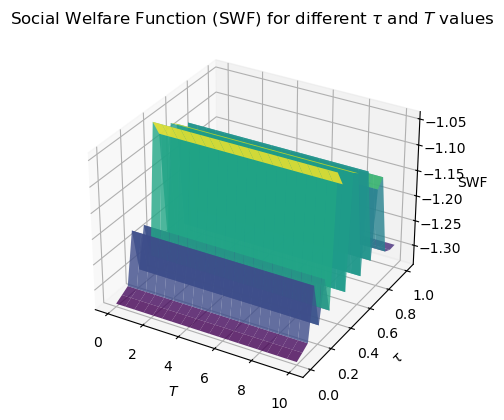

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from types import SimpleNamespace

# Initialize parameters
par = SimpleNamespace()

# Firms
par.A = 1.0
par.gamma = 0.5

# Households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# Government
par.kappa = 1.0  # Assuming some value for kappa

# Wage rate
par.w = 1.0  # Initialize w

# Define firm behavior functions
def labor_demand(p_j, w, par):
    return (p_j * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

def output(l_star, par):
    return par.A * (l_star ** par.gamma)

def profit(p_j, w, par):
    l_star = labor_demand(p_j, w, par)
    return (1 - par.gamma) / par.gamma * w * (p_j * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

# Define consumer behavior functions
def c1(wl, par, pi1, pi2, p1, T):
    return par.alpha * (wl + T + pi1 + pi2) / p1

def c2(wl, par, pi1, pi2, p2, tau, T):
    return (1 - par.alpha) * (wl + T + pi1 + pi2) / (p2 + tau)

def utility(l, par, pi1, pi2, p1, p2, tau, T):
    wl = par.w * l
    c1_star = c1(wl, par, pi1, pi2, p1, T)
    c2_star = c2(wl, par, pi1, pi2, p2, tau, T)
    return np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l**(1 + par.epsilon)) / (1 + par.epsilon)

# Define function to find optimal labor supply
def optimal_labor(par, pi1, pi2, p1, p2, tau, T):
    result = minimize(lambda l: -utility(l, par, pi1, pi2, p1, p2, tau, T), x0=1, bounds=[(0, None)])
    return result.x[0]

# Market clearing conditions
def market_clearing_conditions(prices, par, tau):
    p1, p2 = prices
    w = par.w
    pi1 = profit(p1, w, par)
    pi2 = profit(p2, w, par)
    T = tau * c2(w, par, pi1, pi2, p2, tau, 0)  # Calculate T based on tau and c2
    l_star = optimal_labor(par, pi1, pi2, p1, p2, tau, T)
    c1_star = c1(w * l_star, par, pi1, pi2, p1, T)
    c2_star = c2(w * l_star, par, pi1, pi2, p2, tau, T)
    l1_star = labor_demand(p1, w, par)
    l2_star = labor_demand(p2, w, par)
    y1_star = output(l1_star, par)
    y2_star = output(l2_star, par)
    labor_market = l_star - (l1_star + l2_star)
    goods1_market = c1_star - y1_star
    goods2_market = c2_star - y2_star
    return [labor_market, goods1_market, goods2_market]

# Define the function to find equilibrium prices
def find_equilibrium_prices(tau, par):
    initial_prices = [1.0, 1.0]
    result = minimize(lambda prices: sum(np.square(market_clearing_conditions(prices, par, tau))), initial_prices, bounds=[(0.1, 10.0), (0.1, 10.0)], tol=1e-6)
    return result.x

# Define the grid
tau_values = np.linspace(0.0, 1.0, 20)
T_values = np.linspace(0.0, 10.0, 20)

# Initialize variables to store the best solution and SWF grid
best_tau, best_T = None, None
best_SWF = -float('inf')
SWF_grid = np.zeros((len(tau_values), len(T_values)))
implied_T_grid = np.zeros((len(tau_values), len(T_values)))

# Grid search
for i, tau in enumerate(tau_values):
    for j, T in enumerate(T_values):
        p1, p2 = find_equilibrium_prices(tau, par)
        w = 1.0
        par.w = w

        pi1 = profit(p1, w, par)
        pi2 = profit(p2, w, par)
        T = tau * c2(w, par, pi1, pi2, p2, tau, 0)  # Calculate T based on tau and c2
        l_star = optimal_labor(par, pi1, pi2, p1, p2, tau, T)
        y2_star = output(labor_demand(p2, w, par), par)
        U = utility(l_star, par, pi1, pi2, p1, p2, tau, T)
        SWF = U - par.kappa * y2_star
        
        SWF_grid[i, j] = SWF
        implied_T_grid[i, j] = T
        
        if SWF > best_SWF:
            best_SWF = SWF
            best_tau = tau

print(f"Best tau found: {best_tau:.4f}")
print(f"Best SWF found: {best_SWF:.4f}")
print(f"Implied T for best tau: {implied_T_grid[tau_values == best_tau].max():.4f}")

# Create a 3D plot of the SWF
tau_mesh, T_mesh = np.meshgrid(tau_values, T_values)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(T_mesh, tau_mesh, SWF_grid.T, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('$T$')
ax.set_ylabel('$\\tau$')
ax.set_zlabel('SWF')
ax.set_title('Social Welfare Function (SWF) for different $\\tau$ and $T$ values')

plt.show()


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [7]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [8]:
# begin by setting the seed and drawing from random normal
np.random.seed(1984)
eps = np.random.normal(0,par.sigma,par.K)

# Simulate and calculate expected utility and average realized utility
expected_utility = np.zeros(par.J)
realized_utility = np.zeros(par.J)

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    expected_utility[j] = np.mean(u_kij)
    realized_utility[j] = np.mean(u_kij)

# Display the results
for j in range(par.J):
    print(f"Career track {j+1}:")
    print(f"  Analytical expected utility: {par.v[j]:.4f}")
    print(f"  Simulated Expected Utility: {expected_utility[j]:.4f}")
    print(f"  Simulated Average Realised Utility: {realized_utility[j]:.4f}")

Career track 1:
  Analytical expected utility: 1.0000
  Simulated Expected Utility: 0.9725
  Simulated Average Realised Utility: 0.9725
Career track 2:
  Analytical expected utility: 2.0000
  Simulated Expected Utility: 2.0109
  Simulated Average Realised Utility: 2.0109
Career track 3:
  Analytical expected utility: 3.0000
  Simulated Expected Utility: 3.0358
  Simulated Average Realised Utility: 3.0358


It's worth noticing that the simulated expected and realized utility for each career path are same, and are close to their respective $ v_{j} $. This makes sense at this is close to the mean $ E[u_{i,j}]$ (called 'Analytic expected utility' above), and the discrepency is due to there being a finite number of draws $K=1000$. Moreover, the simulated expected utility and simulated average realised utility are the same because the calculations are made based on the same draws from the normal distribution (with the same seed). 

To visualize the utility from each career path, we also provide a density plot of the distribution of utilities below. 


/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


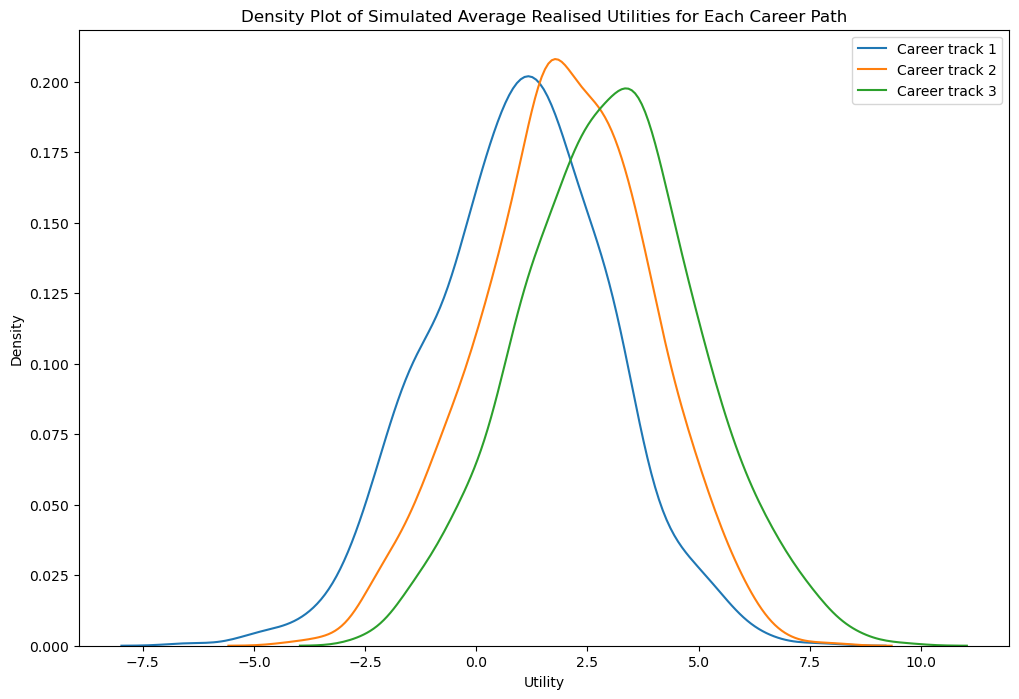

In [36]:
# Plot density plots for each career path
# Simulate utilities
utilities = []

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    utilities.append(u_kij)

# Plot density plots for each career path
plt.figure(figsize=(12, 8))

for j in range(par.J):
    sns.kdeplot(utilities[j], label=f'Career track {j+1}')

plt.title('Density Plot of Simulated Average Realised Utilities for Each Career Path')
plt.xlabel('Utility')
plt.ylabel('Density')
plt.legend()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

|   Graduate |   Share in |   Share in |   Share in |   Avg Subj |   Avg Real |
|            |   Career 1 |   Career 2 |   Career 3 |       Util |       Util |
|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|
|          1 |      0.154 |      0.305 |      0.54  |      3.914 |      2.387 |
|          2 |      0.102 |      0.272 |      0.626 |      3.489 |      2.524 |
|          3 |      0.071 |      0.246 |      0.682 |      3.313 |      2.609 |
|          4 |      0.045 |      0.228 |      0.726 |      3.224 |      2.663 |
|          5 |      0.032 |      0.209 |      0.759 |      3.176 |      2.739 |
|          6 |      0.024 |      0.186 |      0.79  |      3.142 |      2.778 |
|          7 |      0.02  |      0.168 |      0.813 |      3.098 |      2.785 |
|          8 |      0.012 |      0.151 |      0.837 |      3.084 |      2.821 |
|          9 |      0.01  |      0.144 |      0.847 |      3.072 |      2.837 |
|         10 |      0.007 |      0.132 |

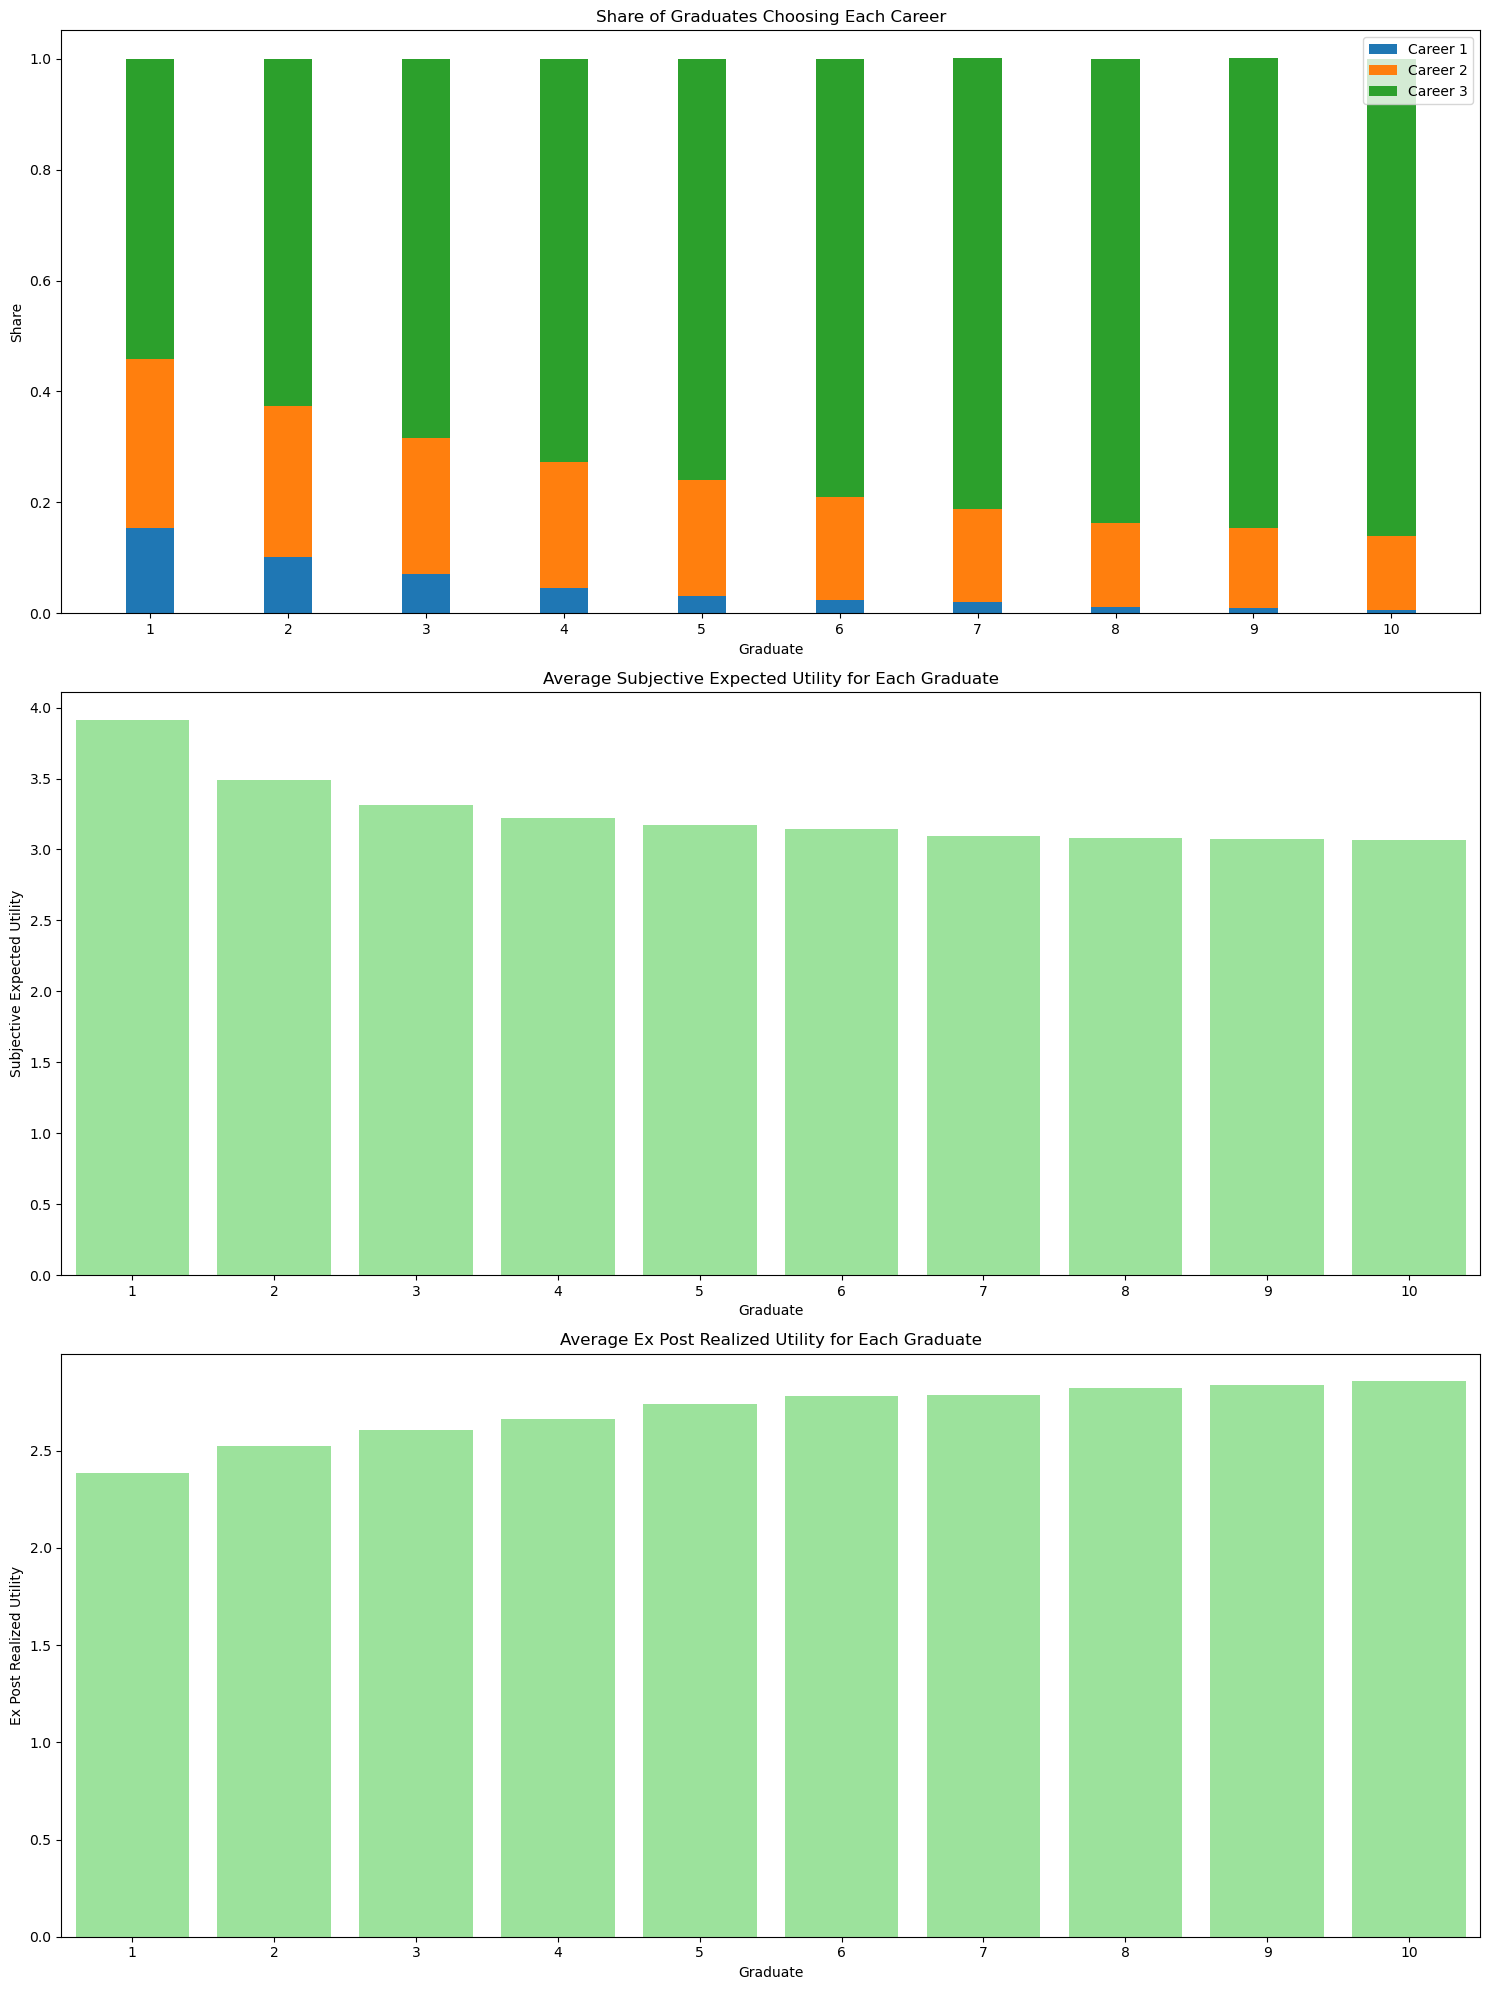

In [10]:
# Initialize arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expectations = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate career choice based on friends' information
for i in range(par.N):
    Fi = i + 1  # Number of friends increases with each graduate
    
    for k in range(par.K):
        prior_utility = np.zeros(par.J)
        own_noise = np.random.normal(0, par.sigma, par.J)
        
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            #print(f'par.v[j]: {par.v[j]}')
            prior_utility[j] = np.mean(par.v[j] + friends_noise)
        
        # Choose the career track with the highest prior expected utility
        chosen_career = np.argmax(prior_utility)
        
        # Store the results
        chosen_careers[i, k] = chosen_career
        prior_expectations[i, k] = prior_utility[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]

# Calculate the required statistics for each graduate
share_of_graduates_choosing_career = np.zeros((par.N, par.J))
average_subjective_expected_utility = np.zeros(par.N)
average_ex_post_realized_utility = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        share_of_graduates_choosing_career[i, j] = np.mean(chosen_careers[i, :] == j)
    average_subjective_expected_utility[i] = np.mean(prior_expectations[i, :])
    average_ex_post_realized_utility[i] = np.mean(realized_utilities[i, :])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Share in\nCareer 1': share_of_graduates_choosing_career[:, 0],
    'Share in\nCareer 2': share_of_graduates_choosing_career[:, 1],
    'Share in\nCareer 3': share_of_graduates_choosing_career[:, 2],
    'Avg Subj\nUtil': average_subjective_expected_utility,
    'Avg Real\nUtil': average_ex_post_realized_utility
})

# Set 'Graduate' as the index
results_df.set_index('Graduate', inplace=True)

# Format the results to reduce decimal places
results_df = results_df.round(3)

# Display the results in a Markdown table
markdown_table = results_df.to_markdown()
print(markdown_table)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the share of graduates choosing each career as a stacked bar chart
width = 0.35
labels = np.arange(1, par.N + 1)
bars1 = results_df['Share in\nCareer 1']
bars2 = results_df['Share in\nCareer 2']
bars3 = results_df['Share in\nCareer 3']

axes[0].bar(labels, bars1, width, label='Career 1')
axes[0].bar(labels, bars2, width, bottom=bars1, label='Career 2')
axes[0].bar(labels, bars3, width, bottom=bars1 + bars2, label='Career 3')
axes[0].set_xlabel('Graduate')
axes[0].set_ylabel('Share')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].legend()
axes[0].set_xticks(labels)  # Ensure all graduate numbers are shown

# Plot the average subjective expected utility for each graduate (single color)
sns.barplot(ax=axes[1], x=np.arange(1, par.N + 1), y=average_subjective_expected_utility, color='lightgreen')
axes[1].set_title('Average Subjective Expected Utility for Each Graduate')
axes[1].set_xlabel('Graduate')
axes[1].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each graduate (single color)
sns.barplot(ax=axes[2], x=np.arange(1, par.N + 1), y=average_ex_post_realized_utility, color='lightgreen')
axes[2].set_title('Average Ex Post Realized Utility for Each Graduate')
axes[2].set_xlabel('Graduate')
axes[2].set_ylabel('Ex Post Realized Utility')

plt.tight_layout()
plt.show()


#### Key Findings

1. **Share of Graduates Choosing Each Career**
   - The share of graduates choosing each career is represented in the first bar chart. Each bar shows the proportion of graduates (from 1 to 10) who chose Career 1, Career 2, and Career 3.
   - As the number of friends increases, the share of graduates choosing Career 3 also increases. This suggests that with more information (from more friends), graduates are more likely to choose the career with the highest true value (Career 3).

2. **Average Subjective Expected Utility**
   - The second bar chart displays the average subjective expected utility for each graduate, which represents their expected utility based on friends' information.
   - Graduates with fewer friends (e.g., Graduate 1) tend to have higher subjective expected utility. This is because their prior information is less precise, leading to potentially higher subjective expectations.

3. **Average Ex Post Realized Utility**
   - The third bar chart shows the average ex post realized utility for each graduate after choosing their career based on the initial information.
   - The realized utility tends to increase with the number of friends. Graduates with more friends have better information, leading to more accurate career choices and higher realized utility.


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

|   Graduate |   Avg Subj Util New |   Avg Real Util New |   Switch Share if initial Career 1 |   Switch Share if initial Career 2 |   Switch Share if initial Career 3 |
|-----------:|--------------------:|--------------------:|-----------------------------------:|-----------------------------------:|-----------------------------------:|
|          1 |               2.725 |               2.162 |                              0.879 |                              0.722 |                              0.42  |
|          2 |               2.55  |               2.296 |                              0.886 |                              0.683 |                              0.407 |
|          3 |               2.559 |               2.372 |                              0.885 |                              0.701 |                              0.403 |
|          4 |               2.469 |               2.3   |                              0.899 |                              0.719 |                  

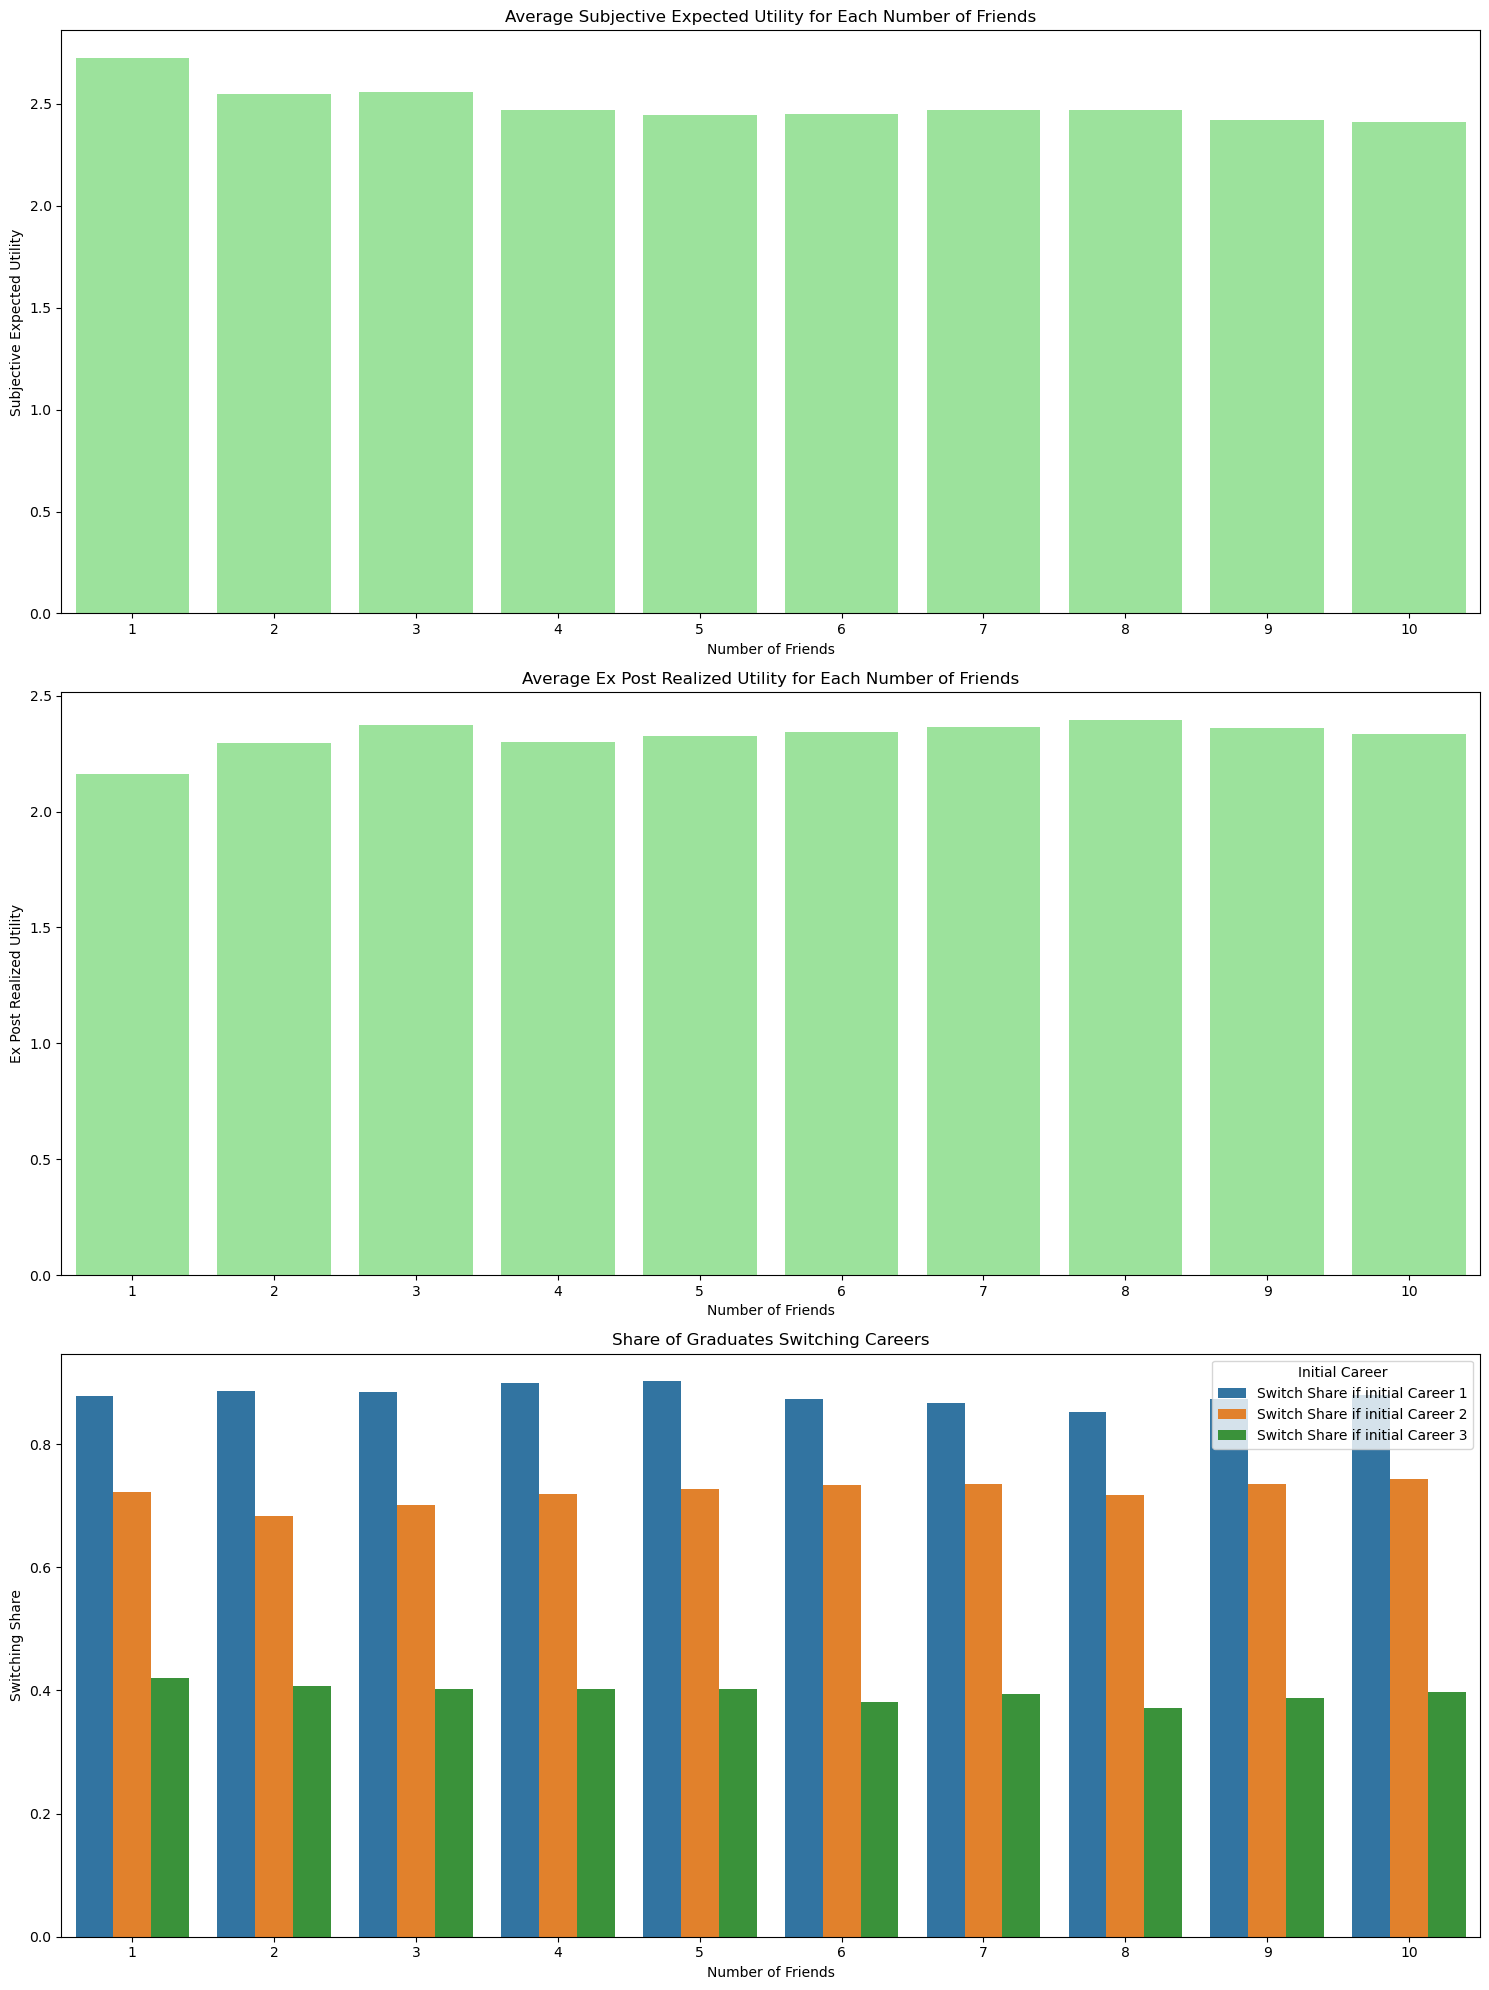

In [34]:

# Initialize arrays for storing results
results = {
    'Graduate': [],
    'Avg Subj Util New': [],
    'Avg Real Util New': [],
    'Switch Share if initial Career 1': [],
    'Switch Share if initial Career 2': [],
    'Switch Share if initial Career 3': []
}

# Simulate behavior for each initial career and number of friends
for num_friends in range(1, par.N + 1):
    new_prior_expectations = np.zeros((par.J, par.K))
    new_realized_utilities = np.zeros((par.J, par.K))
    switches = np.zeros((par.J, par.K), dtype=bool)

    # Perform K simulations for each initial career and number of friends
    for initial_career in range(par.J):
        for k in range(par.K):
            new_priors = np.zeros(par.J)
            new_realized = np.zeros(par.J)

            for j in range(par.J):
                current_utility = par.v[j] + np.random.normal(0, par.sigma)
                friends_noise = np.random.normal(0, par.sigma, num_friends)
                friends_average_utility_cost = np.mean(par.v[j] + friends_noise) - par.c

                if current_utility >= friends_average_utility_cost:
                    new_priors[j] = current_utility
                    new_realized[j] = current_utility
                else:
                    new_priors[j] = friends_average_utility_cost
                    new_realized[j] = par.v[j] + np.random.normal(0, par.sigma) - par.c

            new_chosen_career = np.argmax(new_priors)

            new_prior_expectations[initial_career, k] = new_priors[initial_career]
            new_realized_utilities[initial_career, k] = new_realized[initial_career]
            switches[initial_career, k] = (new_chosen_career != initial_career)

    # Calculate the statistics for each combination of initial career and number of friends
    avg_subj_util_new = np.mean(new_prior_expectations, axis=1)
    avg_real_util_new = np.mean(new_realized_utilities, axis=1)
    switch_share = np.mean(switches, axis=1)

    # Store the results
    results['Graduate'].append(num_friends)
    results['Avg Subj Util New'].append(avg_subj_util_new.mean())
    results['Avg Real Util New'].append(avg_real_util_new.mean())
    results['Switch Share if initial Career 1'].append(switch_share[0])
    results['Switch Share if initial Career 2'].append(switch_share[1])
    results['Switch Share if initial Career 3'].append(switch_share[2])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Format the results to reduce decimal places
results_df = results_df.round(3)

# Display the results in a Markdown table with wrapped labels
markdown_table_new = results_df.to_markdown(index=False)
print(markdown_table_new)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the average subjective expected utility for each combination of initial career and number of friends
sns.barplot(ax=axes[0], data=results_df, x='Graduate', y='Avg Subj Util New', color='lightgreen')
axes[0].set_title('Average Subjective Expected Utility for Each Number of Friends')
axes[0].set_xlabel('Number of Friends')
axes[0].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each combination of initial career and number of friends
sns.barplot(ax=axes[1], data=results_df, x='Graduate', y='Avg Real Util New', color='lightgreen')
axes[1].set_title('Average Ex Post Realized Utility for Each Number of Friends')
axes[1].set_xlabel('Number of Friends')
axes[1].set_ylabel('Ex Post Realized Utility')

# Plot the share of graduates switching careers from each initial choice
switching_shares_df = results_df.melt(id_vars=['Graduate'], value_vars=[
    'Switch Share if initial Career 1', 
    'Switch Share if initial Career 2', 
    'Switch Share if initial Career 3'], 
    var_name='Initial Career', value_name='Switch Share')
sns.barplot(ax=axes[2], data=switching_shares_df, x='Graduate', y='Switch Share', hue='Initial Career')
axes[2].set_title('Share of Graduates Switching Careers')
axes[2].set_xlabel('Number of Friends')
axes[2].set_ylabel('Switching Share')
axes[2].legend(title='Initial Career')

plt.tight_layout()
plt.show()

#### Key Findings

1. **Average Subjective Expected Utility (New)**
   - The first bar chart shows the average subjective expected utility for each graduate after potentially switching careers.
   - Graduates with fewer friends (e.g., Graduate 1) tend to have slightly higher subjective expected utility compared to those with more friends. This is because graduates with fewer friends rely on less precise initial information, leading to potentially larger revisions in their expectations after learning their true utility.

2. **Average Ex Post Realized Utility (New)**
   - The second bar chart displays the average ex post realized utility for each graduate after potentially switching careers.
   - The realized utility is relatively stable across graduates with different numbers of friends, but it is slightly higher for graduates with fewer friends initially. This indicates that while these graduates adjust their career choice based on the true utility they learn, the switching cost impacts their final realized utility less significantly.

3. **Share of Graduates Switching Careers (New)**
   - The third bar chart indicates the share of graduates who switch careers after the first year, conditional on their initial career choice.
   - Unlike previous results, the share of graduates switching careers remains relatively constant across different levels of friends. This suggests that the number of friends does not significantly impact the likelihood of switching careers once the true utility is known.
   - The switching shares are displayed for each initial career choice, with different colors representing switching from Career 1, Career 2, and Career 3 respectively. Graduates initially in Career 1 (the lowest paying career) have the highest switching share, followed by those in Career 2. Graduates initially in Career 3 (the highest paying career) have the lowest switching share, as expected.


#### Approach

To determine the switching behavior and resulting utilities, the following steps were implemented:

1. **Simulate Behavior for Each Initial Career and Number of Friends**
   - For each graduate, simulate the career choice process based on the information from their friends.
   - Calculate the current utility for each career considering the graduate's own noise and the average utility from friends minus the switching cost.

2. **Calculate New Priors and Realized Utilities**
   - Compare the current utility to the friends' average utility cost.
   - If the current utility is higher than the friends' average utility cost, the new prior and realized utilities are set to the current utility. Otherwise, the new prior is set to the friends' average utility cost, and the realized utility is recalculated considering the switching cost.

3. **Determine Optimal Career Choices and Switching Behavior**
   - For each simulation, determine the new chosen career based on the highest new prior utility.
   - Record whether the graduate switches careers and calculate the average subjective expected utility and average ex post realized utility for each graduate.

4. **Aggregate Results and Visualization**
   - Aggregate the results for average subjective expected utility, average ex post realized utility, and switching shares for each graduate and initial career.
   - Visualize the results using bar charts and density plots to illustrate the distribution and patterns of switching behavior and utilities.

The results provide insights into how social information from friends and switching costs influence career choices and utility outcomes for graduates with varying numbers of friends.


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [14]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [15]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [16]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [17]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [18]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [19]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [20]:
# write your answer here